# Bike Share Chicago 2023, Google Data Analytics Capstone Project

##  Case study: How does a bike-share navigate speedy success?

* Scenario:
You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share
company in Chicago. The director of marketing believes the company’s future success
depends on maximizing the number of annual memberships. Therefore, your team wants to
understand how casual riders and annual members use Cyclistic bikes differently. From these
insights, your team will design a new marketing strategy to convert casual riders into annual
members. But first, Cyclistic executives must approve your recommendations, so they must be
backed up with compelling data insights and professional data visualizations.

Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

* Cyclistic’s historical trip data to analyze and identify trends. Download the previous 12
months of Cyclistic trip data here. (Note: The datasets have a different name because Cyclistic
is a fictional company. For the purposes of this case study, the datasets are appropriate and
will enable you to answer the business questions. The data has been made available by
Motivate International Inc. under this license.) https://divvy-tripdata.s3.amazonaws.com/index.html, license : https://divvybikes.com/data-license-agreement

# Loading Libraries

In [1]:
import pandas as pd
import os 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Merging the files

In [ ]:
#year = pd.DataFrame()

#for file in os.listdir(os.getcwd()):
#    if file.endswith('.csv'):
#        year = year.append(pd.read_csv(file))
        
# giving a new file name
#year.to_csv('bikes_year2023.csv', index = False)

# This was the function used to merge the files, they were all in the sabe 

# Reading the CSV file

In [2]:
# This File is a merge between 12 csv's 
df = pd.read_csv('bikes_year2023.csv', index_col = 'ride_id')
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
ride_id,,,,,,,,,,,,
F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [3]:
#Shape of the data 
df.shape

(5719877, 12)

In [4]:
# Understanding the Data 
df.dtypes

rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
# Finding Null Values and if they afect the analysis 
df.isnull().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64

## Looking for Duplicates in the data 

In [11]:
# There is only nulls on the values that will not affect the analysis 
# Finding if there is any duplicates, filtering by the ride_id, wich is supose to be a unique value

In [6]:
df.reset_index(inplace=True)
duplicated_ride_id = df.duplicated(subset=['ride_id'], keep=False)
# Using a if statement to see if there us any duplicated
if duplicated_ride_id.any():
    duplicated_rows = df[duplicated_ride_id]
    print("Duplicated rows based on ride_id:")
    print(duplicated_rows)
else:
    print("No duplicated ride_id found.")

No duplicated ride_id found.


## Deleting columns that will not be used in the analysis 

In [7]:
df.columns
df = df.drop(columns=['start_station_id','end_station_id','start_lat', 'start_lng',
       'end_lat', 'end_lng'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 7 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   end_station_name    object
 6   member_casual       object
dtypes: object(7)
memory usage: 305.5+ MB


## Changing data types, rideable_type and member_casual to category

In [9]:
df['rideable_type']=df['rideable_type'].astype('category')
df['member_casual']=df['member_casual'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 7 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ride_id             object  
 1   rideable_type       category
 2   started_at          object  
 3   ended_at            object  
 4   start_station_name  object  
 5   end_station_name    object  
 6   member_casual       category
dtypes: category(2), object(5)
memory usage: 229.1+ MB


## Changing the datatyoe of started_at and ended_at to datetime 

In [11]:
df['started_at']=pd.to_datetime(df['started_at'], format='%Y-%m-%d %H:%M:%S')
df['ended_at']=pd.to_datetime(df['ended_at'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   member_casual       category      
dtypes: category(2), datetime64[ns](2), object(3)
memory usage: 229.1+ MB


In [12]:
# Creating a new column for the ride duration
df['ride_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [13]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_duration_min
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,member,10.850000
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,member,8.483333
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,Valli Produce - Evanston Plaza,casual,13.233333
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,member,8.766667
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,member,15.316667


## Extracting the month, day of the week and hour  

In [14]:
df['month'] = df['started_at'].dt.month
df['day'] = df['started_at'].dt.dayofweek
df['hour'] = df['started_at'].dt.hour
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_duration_min,month,day,hour
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,Hampden Ct & Diversey Ave,member,10.850000,1,5,20
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,member,8.483333,1,1,15
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,Valli Produce - Evanston Plaza,casual,13.233333,1,0,7
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,member,8.766667,1,6,10
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,Greenwood Ave & 47th St,member,15.316667,1,3,13


## Visualizing the number of rides per month 


In [15]:
# Month goes from 1 to 12, representing the 12 months of the year
# Day 0 to 6, representing the 7 days of the week 
rides_per_month = df.groupby('month').size().reset_index(name='number_of_rides')

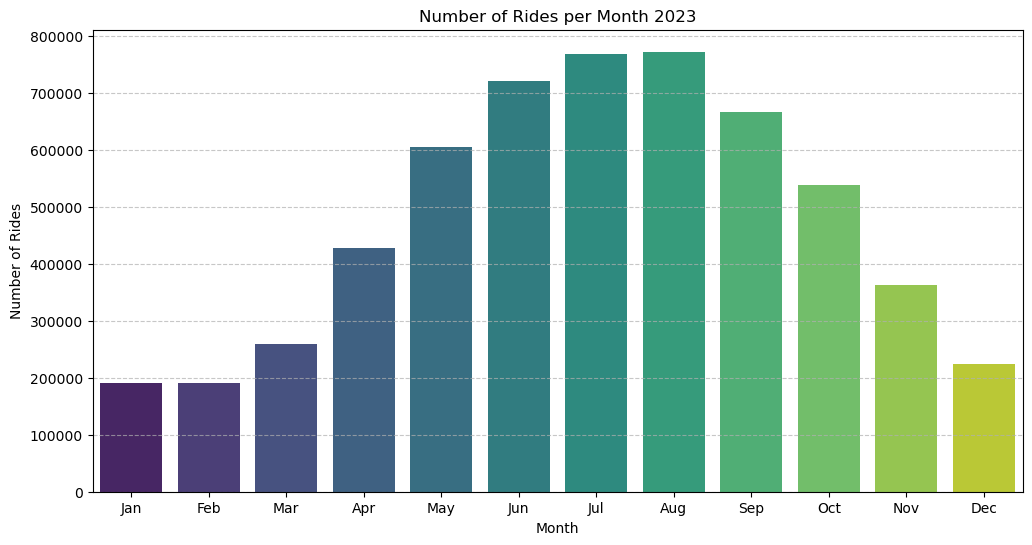

In [16]:
plt.figure(figsize=(12, 6))
# Ploting a bar chart using the months and total rides 
sns.barplot(x='month', y='number_of_rides', data=rides_per_month, color='skyblue', label='Rides per Month', palette='viridis')
plt.title('Number of Rides per Month 2023')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
# Adding the name of the months to the x label                                                                           
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

In [44]:
# The graphic indicates a increase number of rides in the summer, peaking in August and having the least amount in January and February.

In [17]:
rides_per_month

,month,number_of_rides
0,1,190301
1,2,190445
2,3,258678
3,4,426590
4,5,604827
5,6,719618
6,7,767650
7,8,771693
8,9,666371
9,10,537113


## Rides per month Members vs Casuals 

In [18]:
rides_per_month_casual = df.groupby(['month','member_casual']).size().reset_index(name='count')

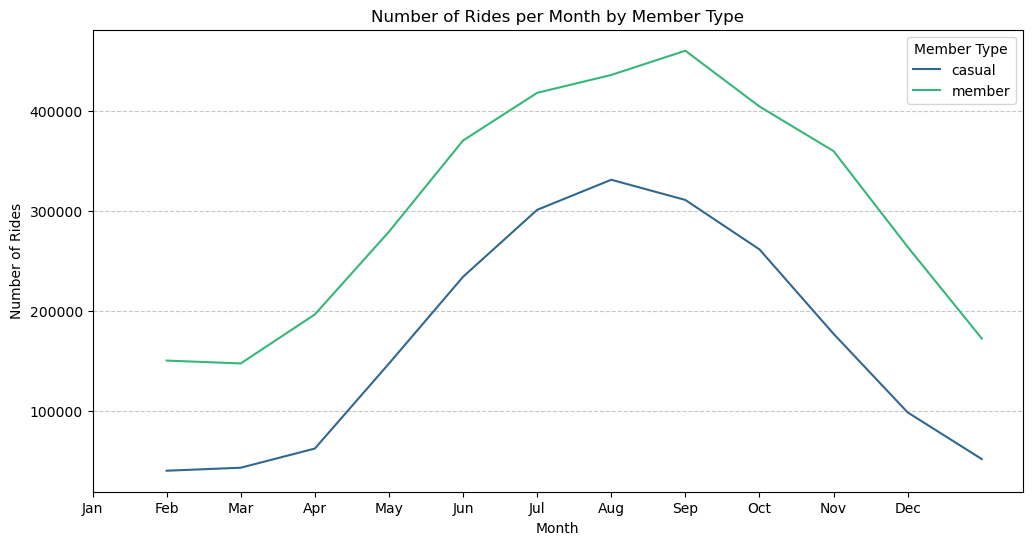

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'month', y = 'count', hue = 'member_casual', data = rides_per_month_casual, palette='viridis')
plt.title('Number of Rides per Month by Member Type')
plt.xlabel('Month')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.ylabel('Number of Rides')
plt.legend(title='Member Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [20]:
rides_per_month_casual.head(10)

,month,member_casual,count
0,1,casual,40008
1,1,member,150293
2,2,casual,43016
3,2,member,147429
4,3,casual,62201
5,3,member,196477
6,4,casual,147285
7,4,member,279305
8,5,casual,234181
9,5,member,370646


In [ ]:
# It is possible to see that members ride more than the casuals, so for a better understanding lets analyse the average time of ride from each 

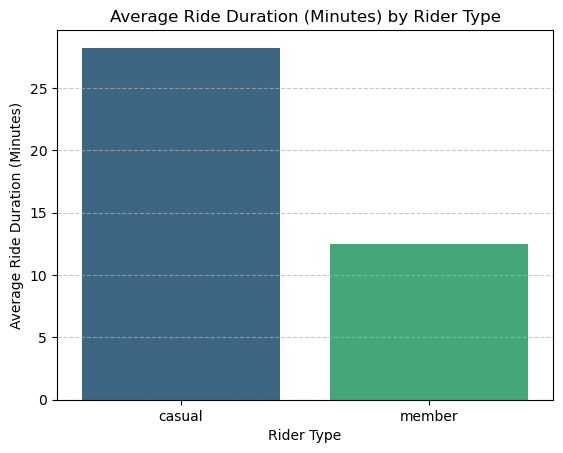

In [21]:
average_duration = df.groupby('member_casual')['ride_duration_min'].mean().reset_index()
sns.barplot(x='member_casual', y='ride_duration_min', data=average_duration, palette='viridis')
plt.title('Average Ride Duration (Minutes) by Rider Type')
plt.xlabel('Rider Type')
plt.ylabel('Average Ride Duration (Minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [22]:
average_duration 

,member_casual,ride_duration_min
0,casual,28.224530
1,member,12.513166


In [ ]:
# Even Though the members ride more, the average time for the casuals is more than double that the members
# Also casual riders might value flexibility and longer ride times, while annual members may prioritize convenience and shorter ride durations.

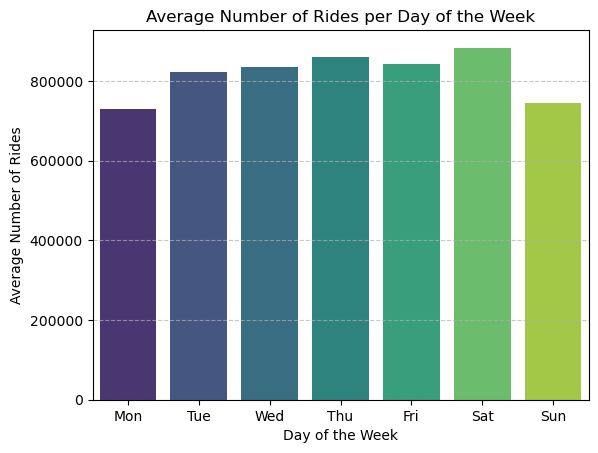

In [23]:
# Visualyzing the average rides per day of the week
rides_day = df.groupby('day').size().reset_index(name='number_of_rides')
average_rides_per_day = rides_day['number_of_rides'] / rides_day['day'].value_counts().sort_index()
sns.barplot(x='day', y='number_of_rides', data=rides_day, palette='viridis')
plt.title('Average Number of Rides per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Rides')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [24]:
rides_day

,day,number_of_rides
0,0,729404
1,1,822978
2,2,835625
3,3,860202
4,4,843524
5,5,883566
6,6,744578


In [101]:
# The rides increase towards the weekend and has a drop during sunday, for a better understanding lets see how casuals and members ride in a week 

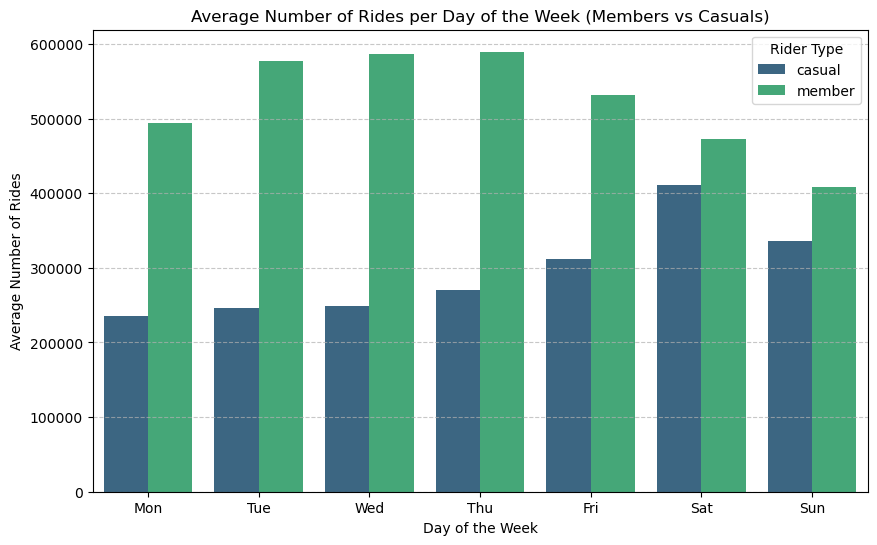

In [25]:
# Grouping By day of week and member_casual
rides_week_member = df.groupby(['day', 'member_casual']).size().reset_index(name='number_of_rides')

plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='number_of_rides', hue='member_casual', data=rides_week_member, palette='viridis')
plt.title('Average Number of Rides per Day of the Week (Members vs Casuals)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Rides')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.legend(title='Rider Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [26]:
rides_week_member

,day,member_casual,number_of_rides
0,0,casual,234828
1,0,member,494576
2,1,casual,246224
3,1,member,576754
4,2,casual,249166
5,2,member,586459
6,3,casual,270612
7,3,member,589590
8,4,casual,311925
9,4,member,531599


In [116]:
# A few insights Casual riders tend to use the bikes more frequently on weekends (Saturday and Sunday), indicating potential leisure or recreational use.
# Annual members exhibit more consistent usage throughout the weekdays, with slightly lower usage compared to casual riders on weekends.

In [27]:
# With this formula its possible to see the average time o ride per weekday, per member/casual
week_duration = df.groupby(['day', 'member_casual'])['ride_duration_min'].mean().reset_index()

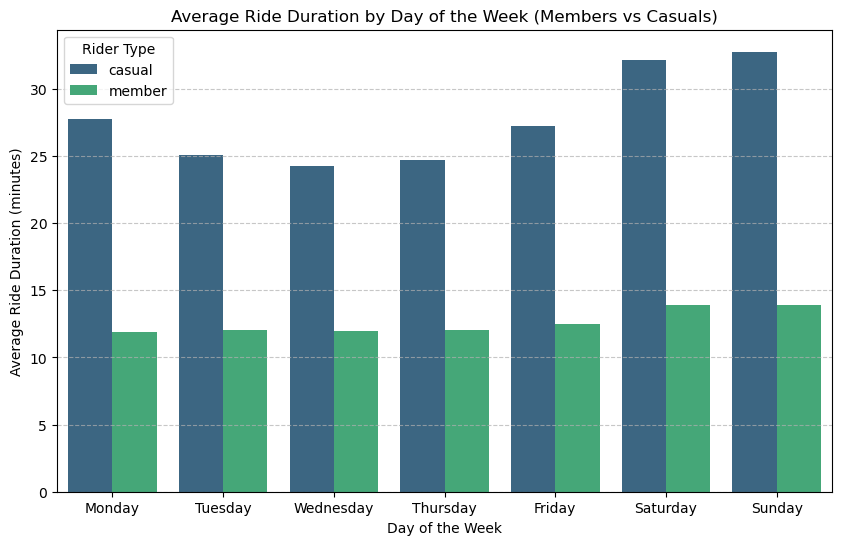

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='ride_duration_min', hue='member_casual', data=week_duration, palette='viridis')
# Adding titles and labels
plt.title('Average Ride Duration by Day of the Week (Members vs Casuals)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Rider Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [29]:
week_duration.head(10)

,day,member_casual,ride_duration_min
0,0,casual,27.713512
1,0,member,11.901922
2,1,casual,25.083305
3,1,member,12.012567
4,2,casual,24.260503
5,2,member,11.929272
6,3,casual,24.724952
7,3,member,12.019379
8,4,casual,27.260775
9,4,member,12.478121


In [ ]:
# Casual riders tend to have longer ride durations compared to members on all days of the week.
# This suggests that casual riders might use the bikes for leisurely activities or longer trips compared to members, who likely use them for shorter, more utilitarian purposes.

#The difference in ride durations between casual and member riders is more pronounced on weekends (Saturday and Sunday)
# This could indicate that weekends are a popular time for casual riders to use the bikes for recreational purposes or extended outings.

# My recomendations are:
# Design targeted campaigns that highlight the convenience and time-saving benefits of membership for weekday commuters.
# Educate casual riders about the cost savings and additional benefits of becoming members, especially if they frequently ride for longer durations.


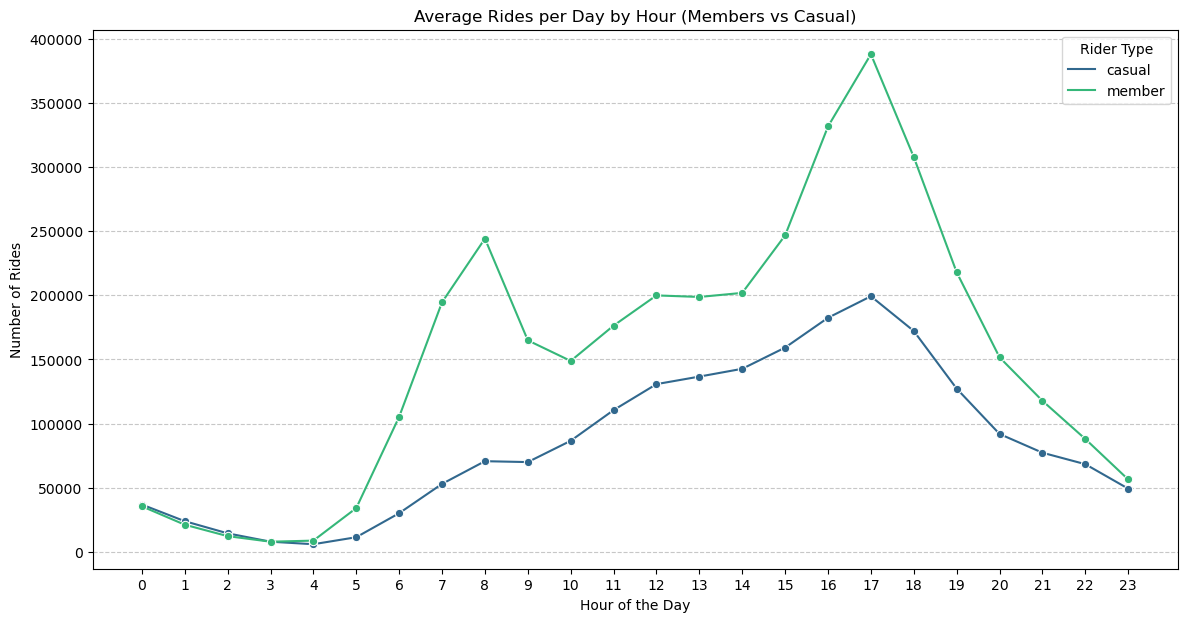

In [30]:
rides_per_hour = df.groupby(['hour', 'member_casual']).size().reset_index(name='number_of_rides')
plt.figure(figsize=(14, 7))
sns.lineplot(x='hour', y='number_of_rides', hue='member_casual', data=rides_per_hour, marker='o', palette='viridis')
plt.title('Average Rides per Day by Hour (Members vs Casual)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Rider Type')

In [31]:
rides_per_hour.head(10)

,hour,member_casual,number_of_rides
0,0,casual,36896
1,0,member,35534
2,1,casual,23929
3,1,member,21185
4,2,casual,14456
5,2,member,12275
6,3,casual,7944
7,3,member,7936
8,4,casual,5969
9,4,member,8778


In [24]:
# Members: The plot shows that members have two main peak periods during the day:
# Morning Peak (7 AM - 9 AM): Members have a significant increase in rides starting around 7 AM, peaking at 8 AM, likely corresponding to their commute to work.
# Evening Peak (4 PM - 6 PM): There's another noticeable peak during the evening, peaking around 5 PM, which aligns with their commute back home from work.

# Casual Riders: The usage pattern for casual riders is more spread out throughout the day:
# Late Morning to Early Afternoon (10 AM - 2 PM): Casual riders start increasing their rides around 10 AM, peaking between 12 PM and 2 PM:
# indicating more leisure or non-commute activities.

## Diference in Bike Types

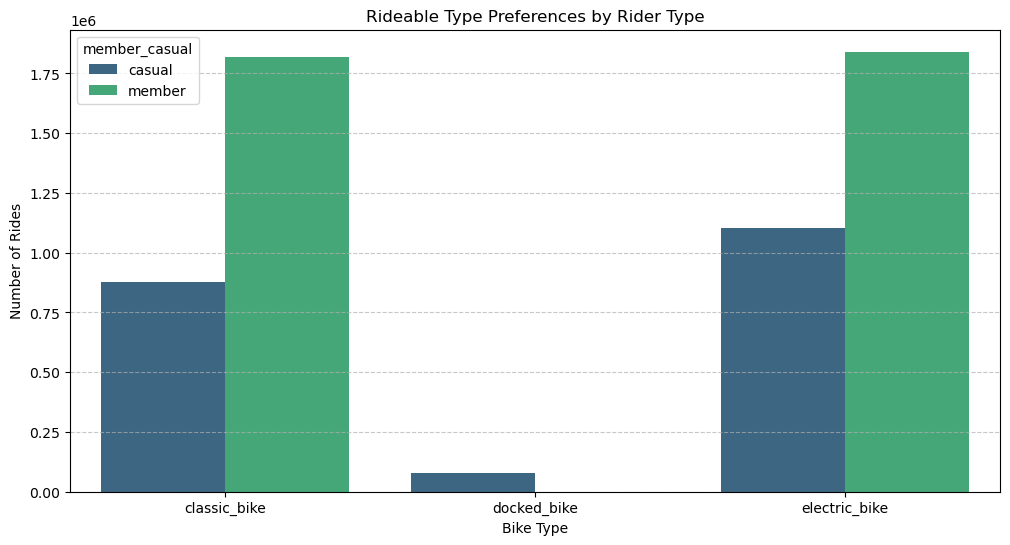

In [32]:
# Analysing the preferences of rideable types between members and casuals 
rideable_type_prefered = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name = 'count')
plt.figure(figsize=(12, 6))
sns.barplot(x='rideable_type', y='count', hue='member_casual', data=rideable_type_prefered, palette='viridis')
plt.title('Rideable Type Preferences by Rider Type')
plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [33]:
rideable_type_prefered

,rideable_type,member_casual,count
0,classic_bike,casual,876881
1,classic_bike,member,1819130
2,docked_bike,casual,78287
3,docked_bike,member,0
4,electric_bike,casual,1104011
5,electric_bike,member,1841568


In [ ]:
# Casual riders have a significant number of rides on electric bikes.
# Marketing strategies can focus on highlighting the benefits of membership specifically for electric bike users.

#Casual riders also have a high usage of classic bikes. Membership campaigns could emphasize the cost savings and convenience of using classic bikes as a member.
#Cost Savings: Demonstrate the potential savings for frequent riders by comparing pay-per-ride costs with annual membership fees.

# The relatively low usage of docked bikes by casual riders suggests that this bike type may not be as appealing. 
# Provide trial memberships or short-term promotions to encourage casual riders to try docked bikes

## Key Locations

(-1.099998142152786, 1.099999909842733, -1.099999924525768, 1.0999999627332273)

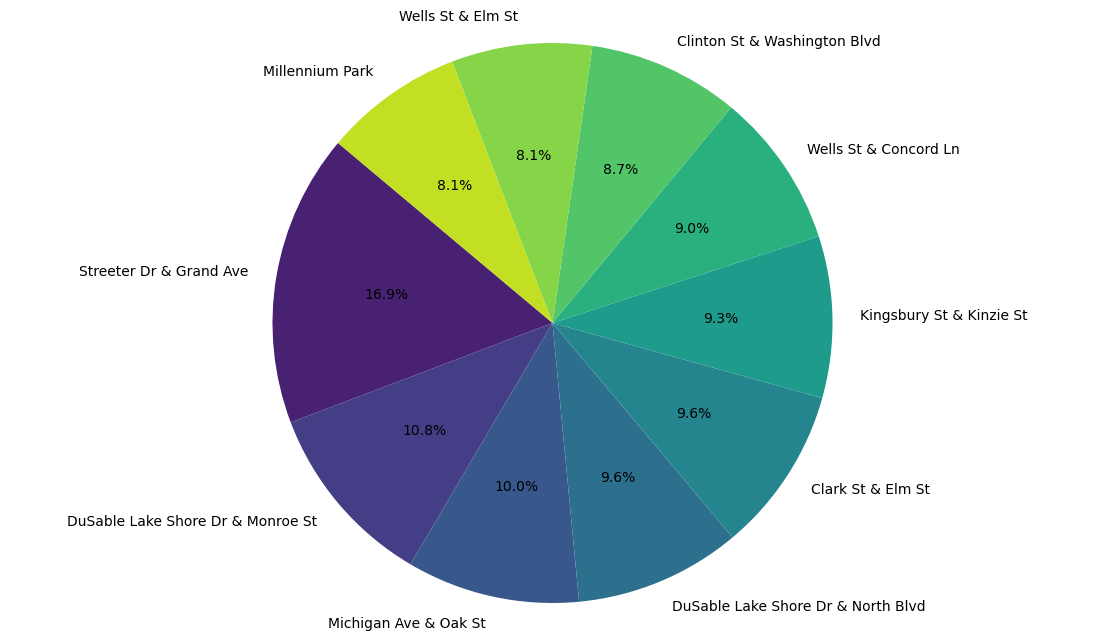

In [34]:
station_usage = df['start_station_name'].value_counts().reset_index(name='count').head(10)

plt.figure(figsize=(14, 8))
plt.pie(station_usage['count'], labels=station_usage['index'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=10))

plt.axis('equal')  # Ensures the chart is drawn as a circle 

In [35]:
station_usage

,index,count
0,Streeter Dr & Grand Ave,63249
1,DuSable Lake Shore Dr & Monroe St,40288
2,Michigan Ave & Oak St,37383
3,DuSable Lake Shore Dr & North Blvd,35966
4,Clark St & Elm St,35805
5,Kingsbury St & Kinzie St,34966
6,Wells St & Concord Ln,33590
7,Clinton St & Washington Blvd,32715
8,Wells St & Elm St,30407
9,Millennium Park,30156


In [27]:
# Stations with the highest number of rides are key locations for targeted marketing and service improvements, such as ensuring bike availability and station maintenance.

# Insights

Based on the data provided, here are insights and recommendations addressing the three key questions:

## 1. How do annual members and casual riders use Cyclistic bikes differently?


- Ride Duration: Casual riders have significantly longer average ride durations compared to annual members. On average, casual riders use the bikes for around 28 minutes, while members use them for approximately 12.5 minutes. This trend holds across all days of the week.

- Ride Frequency by Day: Annual members consistently outnumber casual riders in terms of ride frequency. Members ride more frequently during weekdays, likely commuting to and from work, while casual riders show higher usage on weekends, likely for leisure activities.

- Monthly Trends: Both casual riders and members show increased usage during the warmer months (May to September), with peaks in July and August. However, members have higher ride counts consistently across all months.

- Peak Hours: Members have a clear peak during morning (8-9 AM) and evening (5-6 PM) rush hours, indicating commuting patterns. Casual riders have a more distributed usage throughout the day, with peaks around midday and early afternoon.

# 2. Why would casual riders buy Cyclistic annual memberships?


- Cost Savings: Given the longer average ride durations and frequent usage on weekends, casual riders could save money with an annual membership, especially if they plan to ride regularly.

- Convenience: Annual memberships could offer more convenience with benefits like quicker checkouts, access to member-only services or stations, and more predictable costs.

- Promotional Offers: Casual riders might be enticed by promotions, discounts, or trials that highlight the savings and convenience of becoming a member.

- Enhanced Experience: Members could have access to additional perks like bike availability guarantees during peak times, better maintenance services, or exclusive events.

# 3. How can Cyclistic use digital media to influence casual riders to become members?

- Targeted Campaigns: Use data-driven insights to create targeted digital campaigns that highlight the cost savings, convenience, and additional benefits of annual memberships. Personalized messages based on ride frequency and duration can be more compelling.

- Social Proof and Testimonials: Share stories and testimonials from current members who have benefitted from the switch. Use social media platforms to showcase these narratives.

- Interactive Content: Create interactive content such as calculators that allow casual riders to see potential savings with a membership based on their riding habits.

- In-App Promotions: Utilize the app to send personalized notifications and promotions to frequent casual riders, offering limited-time discounts or trials for annual memberships.

- Events and Challenges: Organize events, challenges, or group rides exclusively for members. Promote these through digital media to show the community and additional value of being a member.